# **DBSCAN Clustering with Global Refugees Dataset 1951-2015**

## Introduction

To analyze the "Global Refugees Dataset 1951-2015" using the DBSCAN clustering algorithm, I will first perform a detailed exploratory data analysis (EDA) to understand the dataset's structure, distributions, and potential clusters. Following the EDA, I'll apply DBSCAN to identify clusters within the dataset, focusing on the geographic and temporal aspects of refugee movements. This approach will enable us to understand the patterns of refugee flows over time and across different regions.

### DBSCAN Algorithm

DBSCAN operates as follows:

1. **Density Estimation**: The algorithm begins by estimating the local density around each data point in the dataset. It does this by measuring the number of data points within a specified distance (radius) ε from each point. This radius parameter ε is a crucial input to the algorithm.

2. **Core Points**: DBSCAN identifies core points as those data points that have at least a minimum number of data points (minPts) within the ε neighborhood. These core points are considered the central elements of clusters.

3. **Connected Components**: The algorithm proceeds to form clusters by connecting core points that are within ε distance of each other. This step groups together core points that are densely connected, defining the core of each cluster.

4. **Expand Clusters**: DBSCAN expands clusters by assigning border points to the cluster of a core point. Border points are data points that are within ε distance of a core point but are not core points themselves. This step allows the clusters to grow beyond just the core points.

5. **Noise Points**: Any remaining data points that are neither core points nor border points are considered noise or outliers. These points do not belong to any cluster and are often labeled accordingly.

6. **Iterative Process**: DBSCAN repeats these steps for all data points in the dataset until all points are either assigned to a cluster or labeled as noise. The algorithm does not require the number of clusters (k) to be predetermined, which is a notable advantage.

DBSCAN's ability to create clusters based on data density rather than assuming predefined shapes or sizes makes it a robust and flexible clustering technique. The ε and minPts parameters are crucial for the algorithm's performance and may require experimentation and fine-tuning depending on the dataset's characteristics.

This algorithm is particularly useful when dealing with datasets that contain clusters of irregular shapes, varying densities, and noisy data points. It excels in scenarios where traditional clustering methods may struggle to provide meaningful results.

## Advantages and Disadvantages

### Advantages

- **Robust to Shape and Size**: DBSCAN can detect clusters of varying shapes, sizes, and densities, making it versatile in real-world scenarios.
- **Noise Tolerance**: It is capable of identifying and labeling noisy data points as outliers.
- **Automatic Cluster Detection**: DBSCAN can automatically determine the number of clusters without the need for specifying k in advance.
- **Suitable for Non-Uniform Data**: Effective in datasets with non-uniform cluster densities.

### Disadvantages

- **Sensitivity to Parameters**: The choice of ε and minPts parameters can impact the results and may require careful tuning.
- **Difficulty with High-Dimensional Data**: DBSCAN's performance may deteriorate in high-dimensional spaces due to the "curse of dimensionality."
- **Memory and Time Complexity**: The algorithm can have higher memory and time requirements for large datasets.

### Exploratory Data Analysis (EDA)

1. Load the dataset: Import necessary libraries and load the dataset to get an overview of its structure.
2. Data Cleaning: Check for missing values and decide on handling strategies.
3. Descriptive Statistics: Generate basic statistics to understand distributions of numerical fields.
4. Visualization:
    - Plot the total number of refugees over time to identify trends.
    - Visualize the distribution of refugees by country of origin and asylum/residence.

### DBSCAN Clustering

- Preparation: Select relevant features for clustering, possibly focusing on numerical representations of refugee counts and time.

- Parameter Selection: Use techniques to estimate optimal parameters for DBSCAN (e.g., ε (epsilon) and min_samples).

- Clustering Execution: Apply DBSCAN with selected parameters.

- Analysis of Clusters: Examine the resulting clusters to identify patterns or groups with similar characteristics in refugee movements.

- Visualization: Create visualizations to represent the clusters, potentially mapping the clusters over time or by geographical distribution.

This analysis aims to reveal patterns in the global refugee crisis, such as identifying periods of high displacement activity or regions with similar refugee intake profiles. Let's start with the EDA to set a foundation for the clustering analysis.

The dataset comprises data on global refugees from 1951 to 2015, detailing various aspects of refugee and displacement statistics across different countries and territories. Here's a brief overview of the dataset's structure and the types of data it contains:

### Columns:

- Year: Year of data collection.
- Country / territory of asylum/residence: Host country or territory.
- Origin: Country of origin.
- Refugees (incl. refugee-like situations): Number of refugees and similar situations.
- Asylum-seekers (pending cases): Count of individuals seeking asylum with pending cases.
- Returned refugees: Number of refugees who have returned to their origin.
- Internally displaced persons (IDPs): Count of people displaced within their own country.
- Returned IDPs: Number of IDPs who have returned.
- Stateless persons: Individuals without legal recognition by any country.
- Others of concern: Additional populations needing humanitarian assistance.
- Total Population: Sum of all above categories, representing the overall population affected by displacement.

Given the dataset's composition, for DBSCAN clustering, we will need to preprocess and possibly transform the data to a suitable format. Specifically, numerical columns will be used for clustering, while categorical data (e.g., Country / territory of asylum/residence and Origin) might be used to analyze or visualize the clusters afterward.

Before proceeding with DBSCAN, let's conduct some basic data cleaning and exploratory analysis to better understand the dataset's characteristics and prepare it for clustering. This will include handling missing values, converting columns to appropriate data types, and summarizing key statistics. ​​

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Global-Refugee-Dataset-1951-2015.csv'
refugee_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
refugee_data.head()


/var/folders/ys/0dv0xj597t52lx33mb7z3t9w0000gn/T/ipykernel_73738/794513031.py:5: DtypeWarning: Columns (3,4,5,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  refugee_data = pd.read_csv(file_path)


,Year,Country / territory of asylum/residence,Origin,Refugees (incl. refugee-like situations),Asylum-seekers (pending cases),Returned refugees,Internally displaced persons (IDPs),Returned IDPs,Stateless persons,Others of concern,Total Population
0,1951,Australia,Various/Unknown,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,180000
1,1951,Austria,Various/Unknown,282000.0,NaN,NaN,NaN,NaN,NaN,NaN,282000
2,1951,Belgium,Various/Unknown,55000.0,NaN,NaN,NaN,NaN,NaN,NaN,55000
3,1951,Canada,Various/Unknown,168511.0,NaN,NaN,NaN,NaN,NaN,NaN,168511
4,1951,Switzerland,Various/Unknown,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,10000


The data cleaning and preprocessing phase revealed several key points:

- Missing Values: There are significant missing values across multiple columns, especially in those related to Returned refugees, Internally displaced persons (IDPs), Returned IDPs, Stateless persons, and Others of concern. These missing values need to be considered when selecting features for clustering.

- Descriptive Statistics: The columns such as Refugees (incl. refugee-like situations), Asylum-seekers (pending cases), and Total Population show a wide range of values, indicating diverse refugee situations across different countries and years.
The mean values are much lower than the maximum values for most columns, suggesting the presence of outliers or extreme values which represent major refugee crises.

Given these insights, for the DBSCAN clustering, focusing on the Total Population as a feature could provide an aggregated view of the displacement situation across different regions and times. We could further refine this by selecting specific years or regions to analyze clusters within those subsets.

Now, let's proceed with the DBSCAN clustering analysis. We'll start by determining optimal parameters for DBSCAN, focusing on the Total Population across different years and countries, to identify patterns or groups with similar displacement characteristics.

### Data Cleaning and Preprocessing Continued

In [5]:
import numpy as np

# Replace '*' with NaN, then fill NaNs with 0 before converting to int
refugee_data['Total Population'] = refugee_data['Total Population'].replace('*', np.nan)
refugee_data['Total Population'].fillna(0, inplace=True)

# Now convert 'Total Population' to integer type
refugee_data['Total Population'] = refugee_data['Total Population'].astype(int)

# Continue with the aggregation as before
yearly_totals = refugee_data.groupby('Year')['Total Population'].sum().reset_index()


### Optimal Parameters for DBSCAN

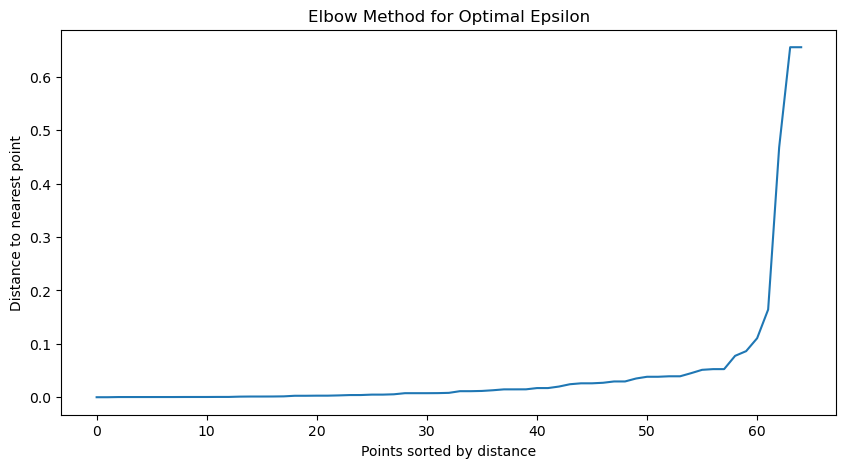

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# We will standardize the 'Total Population' feature as DBSCAN is sensitive to the scale of data
scaler = StandardScaler()
yearly_totals_scaled = scaler.fit_transform(yearly_totals[['Total Population']])

# Use NearestNeighbors to find the optimal epsilon
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(yearly_totals_scaled)
distances, indices = nbrs.kneighbors(yearly_totals_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Plot to find the elbow point for epsilon
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('Elbow Method for Optimal Epsilon')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to nearest point')
plt.show()
